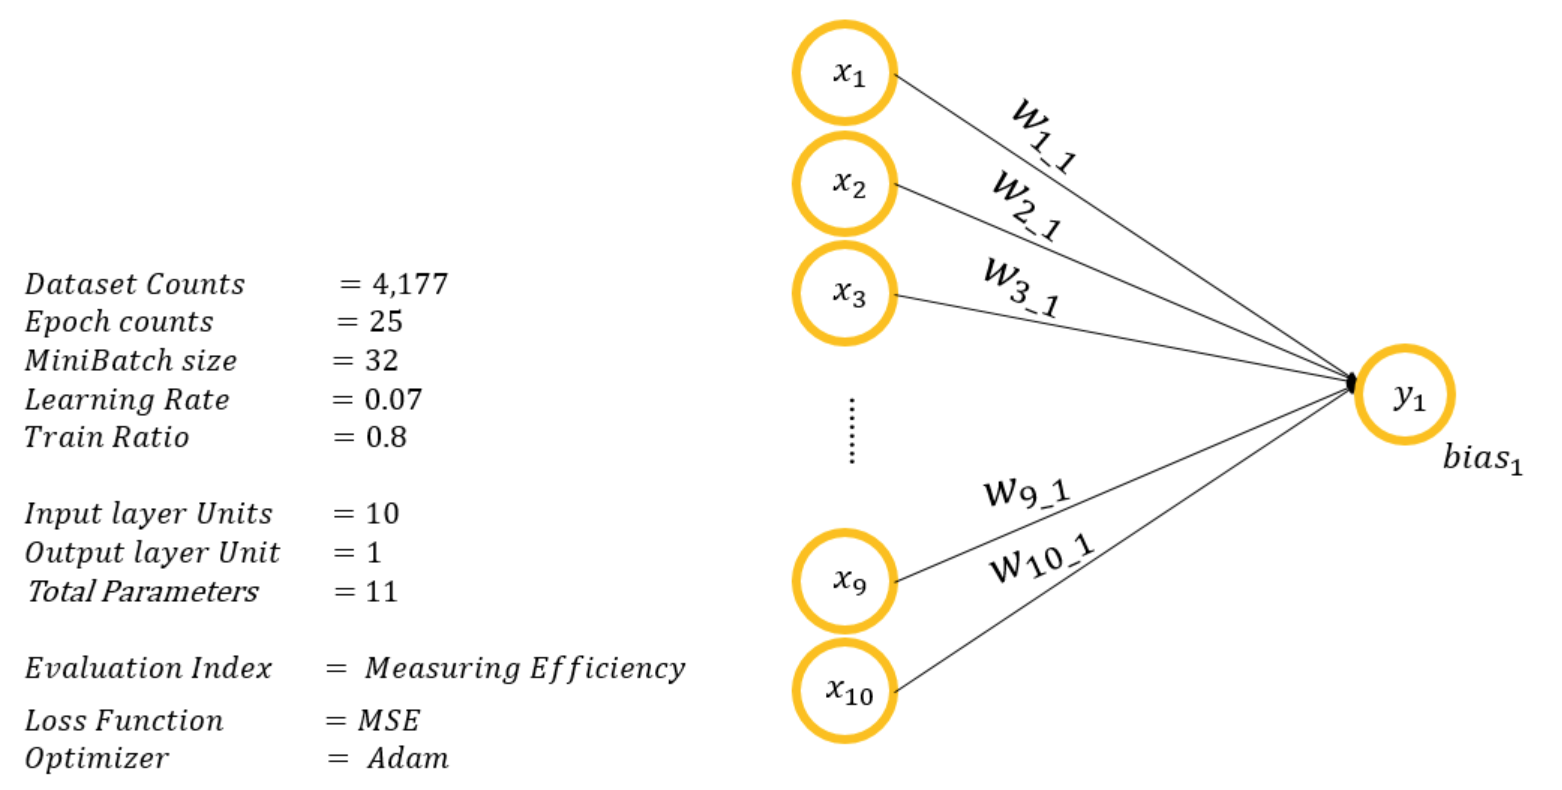

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np 
import csv

In [2]:
df = pd.read_csv('/content/abalone.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:

with open ('/content/abalone.csv') as csvf:
  csvreader = csv.reader(csvf)
  next(csvreader) #첫번쨰 값들을 건너 뛴다

  rows = []
  for row  in csvreader:
    rows.append(row)

In [4]:
input_cnt =10
output_cnt = 1

data = np.zeros([len(rows),input_cnt+output_cnt]) #행과 열의 개수가 맞춰진 버퍼 생성

print(data.shape)

(4177, 11)


In [5]:
#one hat vector 처리 
for n,r in enumerate(rows):
  if r[0] == 'M':
    data[n,0] =1 
  if r[0] == 'F':
    data[n,1] = 1
  if r[0] == 'I':
    data[n,2] = 1
  
  data[n,3 :] = r[1:]

In [6]:
#train_test_split
train_ratio = 0.8
train_idx = int(data.shape[0] * train_ratio)

print(train_idx)

3341


In [7]:
#shffle map
shffle_map = np.arange(data.shape[0])
np.random.shuffle(shffle_map)
print(shffle_map[:5])

[3205 3865 1005 2912  461]


In [8]:
#train_test_split
train_data = data[shffle_map[:train_idx]]
print(train_data.shape)

test_data = data[shffle_map[train_idx:]]
print(test_data.shape)

(3341, 11)
(836, 11)


In [9]:
#독립 /종속 
train_x,train_y =train_data [:,:-output_cnt] ,train_data[:,-output_cnt:]
test_x,test_y  = test_data [:,:-output_cnt] , test_data[:,-output_cnt:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(3341, 10)
(3341, 1)
(836, 10)
(836, 1)


In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(
                                 units = 1,
                                 input_shape=(10,)
                             )
])



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.07),loss = 'mse')
'''
metrics 정확도 측정 
근데 회귀 에서는 쓰기 힘든 이유는
회귀는 정확히 예측 해야 하는데 
근접 하더라도 틀렸다고 나온다 
그래서 직접 구하는거다.
'''

'\nmetrics 정확도 측정 \n근데 회귀 에서는 쓰기 힘든 이유는\n회귀는 정확히 예측 해야 하는데 \n근접 하더라도 틀렸다고 나온다 \n그래서 직접 구하는거다.\n'

In [13]:
history = model.fit(train_x,train_y,epochs = 200,batch_size=32,validation_split=0.2,callbacks=tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=5))

'''
callback earlystopping 
monitor : 조기 중단할 값으로 뭘 볼것이냐 
patient : 몇번 값이 안좋아지면 멈출것이냐 
'''


Epoch 1/200
84/84 [==============================] - 1s 3ms/step - loss: 20.0219 - val_loss: 7.5380
Epoch 2/200
84/84 [==============================] - 0s 2ms/step - loss: 7.6822 - val_loss: 6.8975
Epoch 3/200
84/84 [==============================] - 0s 1ms/step - loss: 7.1984 - val_loss: 6.4900
Epoch 4/200
84/84 [==============================] - 0s 1ms/step - loss: 6.8949 - val_loss: 6.2216
Epoch 5/200
84/84 [==============================] - 0s 1ms/step - loss: 6.7008 - val_loss: 6.0964
Epoch 6/200
84/84 [==============================] - 0s 2ms/step - loss: 6.5378 - val_loss: 5.9015
Epoch 7/200
84/84 [==============================] - 0s 1ms/step - loss: 6.3951 - val_loss: 5.7989
Epoch 8/200
84/84 [==============================] - 0s 1ms/step - loss: 6.2594 - val_loss: 5.6381
Epoch 9/200
84/84 [==============================] - 0s 1ms/step - loss: 6.1161 - val_loss: 5.5084
Epoch 10/200
84/84 [==============================] - 0s 1ms/step - loss: 5.9800 - val_loss: 5.3942
Epoch 11

'\ncallback earlystopping \nmonitor : 조기 중단할 값으로 뭘 볼것이냐 \npatient : 몇번 값이 안좋아지면 멈출것이냐 \n'

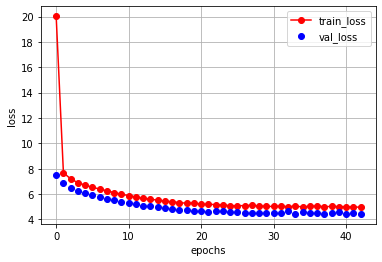

In [14]:
plt.plot(history.history['loss'],'-o',c = 'red',label = 'train_loss')
plt.plot(history.history['val_loss'],'o',c = 'blue',label = 'val_loss')
plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [15]:
pred_y = model.predict(test_x)
print(pred_y)

[[12.063639 ]
 [ 8.712903 ]
 [ 9.397541 ]
 [ 8.099516 ]
 [10.202051 ]
 [10.295014 ]
 [ 9.64052  ]
 [12.281708 ]
 [ 9.612847 ]
 [11.55857  ]
 [ 9.013145 ]
 [ 9.744693 ]
 [ 9.125306 ]
 [11.543474 ]
 [ 7.1147714]
 [ 9.556066 ]
 [11.336129 ]
 [10.694624 ]
 [ 9.864997 ]
 [10.265824 ]
 [11.253132 ]
 [10.211688 ]
 [12.018463 ]
 [ 9.660101 ]
 [ 8.108948 ]
 [10.651341 ]
 [11.922483 ]
 [12.729214 ]
 [ 9.258427 ]
 [ 9.291061 ]
 [ 8.430183 ]
 [ 8.917637 ]
 [ 9.6112   ]
 [ 9.913106 ]
 [ 7.3628063]
 [10.295696 ]
 [12.362198 ]
 [ 9.939365 ]
 [10.471031 ]
 [11.979233 ]
 [ 9.144028 ]
 [12.526007 ]
 [12.165083 ]
 [ 6.803768 ]
 [ 8.786256 ]
 [ 7.094675 ]
 [11.942185 ]
 [ 6.4644012]
 [ 9.869996 ]
 [ 8.290228 ]
 [ 9.191238 ]
 [13.211309 ]
 [12.635419 ]
 [10.10188  ]
 [ 8.685785 ]
 [ 8.792408 ]
 [ 9.3048725]
 [10.11536  ]
 [14.236463 ]
 [10.339131 ]
 [10.460091 ]
 [16.592434 ]
 [15.515234 ]
 [ 7.098664 ]
 [14.004168 ]
 [ 7.546761 ]
 [ 9.153369 ]
 [11.084163 ]
 [ 6.352142 ]
 [ 7.3587823]
 [10.835297 ]
 [ 9.5

In [16]:
print(test_y)

[[12.]
 [12.]
 [10.]
 [ 8.]
 [ 8.]
 [12.]
 [13.]
 [ 9.]
 [ 9.]
 [12.]
 [11.]
 [ 8.]
 [ 9.]
 [10.]
 [ 7.]
 [ 8.]
 [ 9.]
 [17.]
 [10.]
 [10.]
 [15.]
 [15.]
 [12.]
 [ 9.]
 [10.]
 [ 9.]
 [20.]
 [18.]
 [ 9.]
 [10.]
 [ 8.]
 [11.]
 [ 9.]
 [ 8.]
 [ 7.]
 [19.]
 [10.]
 [10.]
 [ 8.]
 [ 9.]
 [11.]
 [13.]
 [16.]
 [ 7.]
 [10.]
 [ 6.]
 [14.]
 [ 6.]
 [ 7.]
 [ 8.]
 [10.]
 [11.]
 [10.]
 [ 9.]
 [13.]
 [ 9.]
 [ 8.]
 [15.]
 [ 6.]
 [ 9.]
 [11.]
 [17.]
 [11.]
 [ 6.]
 [20.]
 [10.]
 [12.]
 [10.]
 [ 7.]
 [ 7.]
 [16.]
 [ 9.]
 [ 5.]
 [11.]
 [ 9.]
 [ 4.]
 [ 8.]
 [10.]
 [ 7.]
 [ 8.]
 [12.]
 [ 9.]
 [13.]
 [10.]
 [11.]
 [17.]
 [12.]
 [ 9.]
 [10.]
 [ 5.]
 [13.]
 [ 5.]
 [13.]
 [ 8.]
 [13.]
 [ 6.]
 [14.]
 [13.]
 [ 9.]
 [ 6.]
 [10.]
 [10.]
 [ 9.]
 [10.]
 [ 8.]
 [ 6.]
 [11.]
 [10.]
 [ 5.]
 [ 8.]
 [12.]
 [ 8.]
 [ 7.]
 [13.]
 [13.]
 [ 9.]
 [ 9.]
 [11.]
 [ 5.]
 [ 7.]
 [ 6.]
 [ 5.]
 [15.]
 [ 7.]
 [ 6.]
 [ 9.]
 [11.]
 [ 9.]
 [ 7.]
 [ 7.]
 [16.]
 [ 8.]
 [10.]
 [ 7.]
 [ 8.]
 [11.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [12.]
 [ 8.]
 [ 8.]

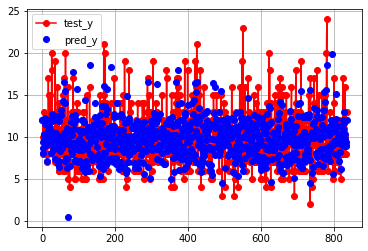

In [17]:
plt.plot(test_y,'-o',c = 'red',label = 'test_y')
plt.plot(pred_y,'o',c = 'blue',label = 'pred_y')
plt.legend()
plt.grid()
plt.show()

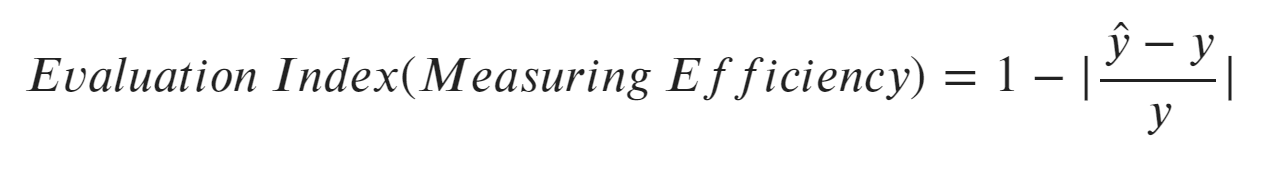

In [18]:
acc = 1 -np.mean(np.abs((pred_y - test_y)/test_y))
print(acc*100)

83.46346595738223


In [19]:
param = model.get_weights()

print(param[0])
print(param[1])

[[  2.4249065]
 [  2.0410783]
 [  1.382288 ]
 [  3.3837488]
 [  5.189878 ]
 [ 12.396623 ]
 [  4.1646805]
 [-15.3115   ]
 [ -5.567988 ]
 [ 15.081825 ]]
[1.7270397]


In [20]:
model.save('mymodel.h5') #model 자체를 저장

In [22]:
load_model=tf.keras.models.load_model('/content/mymodel.h5')
load_model

In [23]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [24]:
load_model.evaluate(test_x,test_y)


27/27 [==============================] - 0s 2ms/step - loss: 5.0169


5.016897678375244

In [25]:
pred_y = load_model.predict(test_x)
print(pred_y)

[[12.063639 ]
 [ 8.712903 ]
 [ 9.397541 ]
 [ 8.099516 ]
 [10.202051 ]
 [10.295014 ]
 [ 9.64052  ]
 [12.281708 ]
 [ 9.612847 ]
 [11.55857  ]
 [ 9.013145 ]
 [ 9.744693 ]
 [ 9.125306 ]
 [11.543474 ]
 [ 7.1147714]
 [ 9.556066 ]
 [11.336129 ]
 [10.694624 ]
 [ 9.864997 ]
 [10.265824 ]
 [11.253132 ]
 [10.211688 ]
 [12.018463 ]
 [ 9.660101 ]
 [ 8.108948 ]
 [10.651341 ]
 [11.922483 ]
 [12.729214 ]
 [ 9.258427 ]
 [ 9.291061 ]
 [ 8.430183 ]
 [ 8.917637 ]
 [ 9.6112   ]
 [ 9.913106 ]
 [ 7.3628063]
 [10.295696 ]
 [12.362198 ]
 [ 9.939365 ]
 [10.471031 ]
 [11.979233 ]
 [ 9.144028 ]
 [12.526007 ]
 [12.165083 ]
 [ 6.803768 ]
 [ 8.786256 ]
 [ 7.094675 ]
 [11.942185 ]
 [ 6.4644012]
 [ 9.869996 ]
 [ 8.290228 ]
 [ 9.191238 ]
 [13.211309 ]
 [12.635419 ]
 [10.10188  ]
 [ 8.685785 ]
 [ 8.792408 ]
 [ 9.3048725]
 [10.11536  ]
 [14.236463 ]
 [10.339131 ]
 [10.460091 ]
 [16.592434 ]
 [15.515234 ]
 [ 7.098664 ]
 [14.004168 ]
 [ 7.546761 ]
 [ 9.153369 ]
 [11.084163 ]
 [ 6.352142 ]
 [ 7.3587823]
 [10.835297 ]
 [ 9.5